### AIDI 1002 - Exercise 2: Cross Validation (KNN, DT, RF)

Michael Molnar

100806823

<b> Task:</b>

We are looking to develop a classifcation algorithm to predict a breast cancer diagnoses of benign or malignant based upon 32 characteristics.  This notebook will explore a dataset of cancer biopsies measurements.  It will explore the data in depth and then transform it for cross validation and testing of k-Nearest Neighbours, Decision Tree, and Random Forest algorithms.  It will then identify the most accurate of these and look to improve upon it.

### Data Acquisiton

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
# Assign dataset to data frame
df_cancer = pd.read_csv('dataset.csv')

In [442]:
# List the data types
df_cancer.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [443]:
# Get the size 
df_cancer.shape

(569, 32)

In [444]:
# Display the first five rows
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


### Data Source Information

- "diagnosis"  - "M" for malignant and "B" for benign is the target. 
- "id" - cancer biopsy identification number. 
- we have 30 numerical features that are laboratory measurements.
- we have 569 observations.

In [445]:
# Check for any duplicate rows
duplicate_rows_df = df_cancer[df_cancer.duplicated()]
print("Duplicated Rows:")
print(duplicate_rows_df)

Duplicated Rows:
Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, points_mean, symmetry_mean, dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, points_se, symmetry_se, dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, points_worst, symmetry_worst, dimension_worst]
Index: []

[0 rows x 32 columns]


In [446]:
# Check for missing values
df_cancer.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

<b>Summary: </b>
- Dataset contains 569 rows and 32 columns 
- Class to predict is "diagnosis"
- We have 30 numerical features and an id column
- All rows are unique and there are no missing values

### Exploratory Data Analysis (EDA)

In [447]:
# Statistcal information
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<b> Observations: </b>
- We see some potential outliers right away - area_mean has a mean of 654.89 and a max of 2501; concavity_mean has a mean of 0.089 and a max of 0.427; area_worst has a mean of 880.583 and a max of 4254
- The scales of some of the features are vastly different - a lot have means close to 0, but area_mean has a mean of 654.89 and area_worst has a mean of 880.58.
- The data will require scaling before applying the algorithms 

<b> Analyzing the Target (diagnosis): </b>

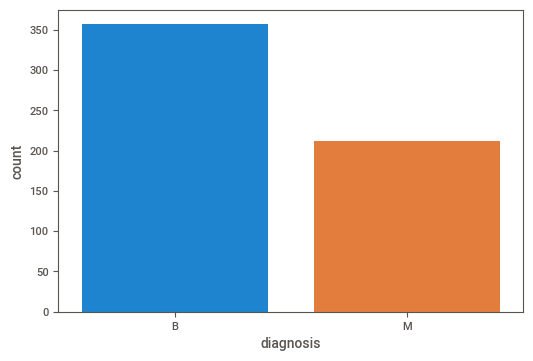

In [448]:
ax = sns.countplot(x="diagnosis", data=df_cancer)

In [449]:
df_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

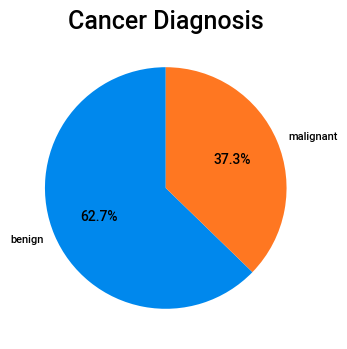

In [450]:
labels = ['benign', 'malignant']
sizes = [357/569, 212/569]

plt.figure(figsize=(8,4))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', startangle=90)
plt.title("Cancer Diagnosis", fontsize=18);

plt.show()

<b> Observations: </b>
- 62.7% of our samples are benign and 37.3% are malignant.

<b> Analyzing Numerical Feautres: </b>

In [451]:
# First we will encode the diagnosis column with 1 for malignant and 0 for benign.
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})

# We will also drop the "id" column as this will not provide us with any information 
df_cancer.drop(columns='id', inplace=True)

In [452]:
import sweetviz as sv
cancer_report = sv.analyze(df_cancer)

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [453]:
cancer_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


From this report we can observe a couple of things:
- All numerical features seem to follow a normal distribution with positive skew
- We have a lot of correlation between different features

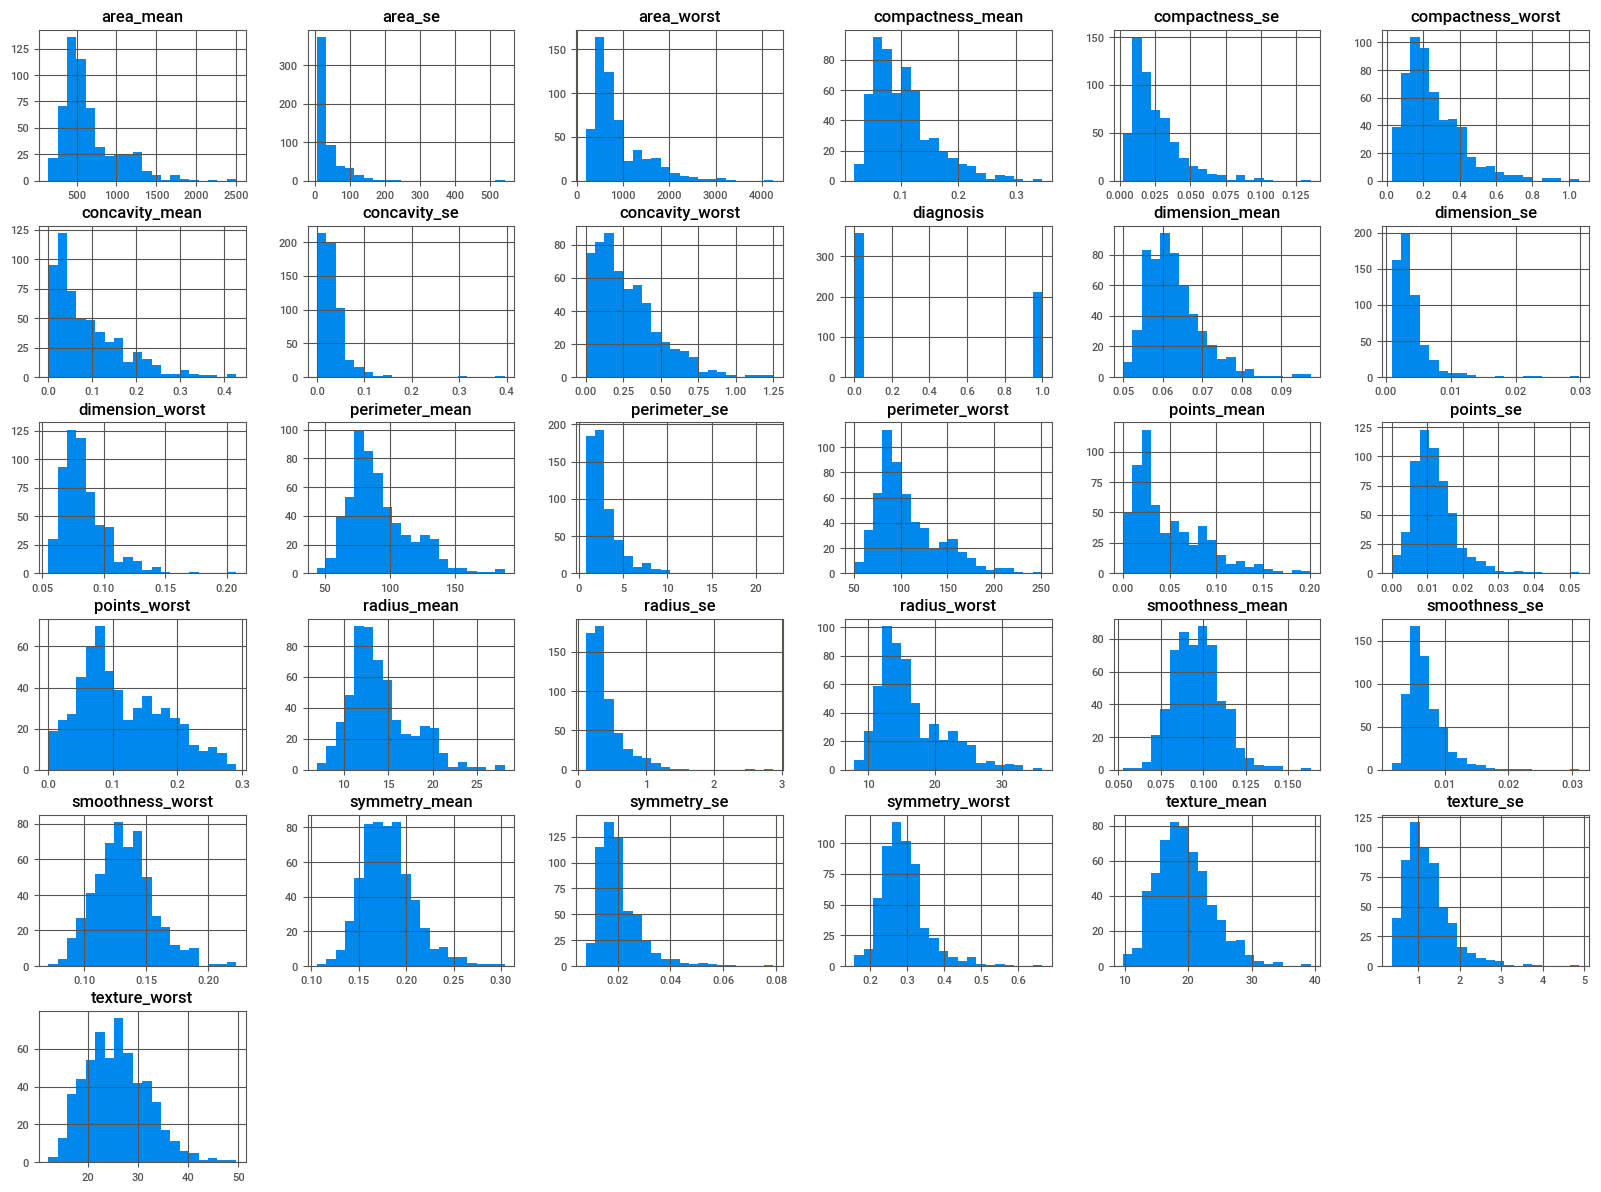

In [454]:
# First plot the histograms of each feature
df_cancer.hist(bins=20, figsize=(20, 15))
plt.show()

<b> Observations: </b>
- We note again the vastly different scales - we will resolve this by scaling the data before using the learning algorithms.
- All of our features appear to have a normal distribution, but they all show positive skew
- We will address this by looking at outliers and then a Log transformation

In [455]:
# Next, plot histograms for each of the numerical features and the targets 
import plotly.graph_objects as go
feature_names = df_cancer.columns[1:]
fig_hist = []

for i, feature_name in enumerate(df_cancer[feature_names]):
    fig_hist.append(go.Figure())
    for label in [0,1]:
        fig_hist[i].add_trace(go.Histogram(x=df_cancer[df_cancer["diagnosis"]==label][feature_name], name=label))
    fig_hist[i].update_layout(height=400, width=800, title_text=feature_name)
    fig_hist[i].update_layout(barmode='overlay')
    fig_hist[i].update_traces(opacity=0.5)
    fig_hist[i].show()

<b> Obervations:</b>
- We note that some features show a clear separation between the two target classes
- perimeter_mean, area_mean, concavity_mean, radius_worst, and points_worst are examples

- We also note that some features show a lot of overlap between the two target classes
- smoothness_mean, dimension_mean, texture_se, dimension_se, and smoothness_se are examples

<b> Analyzing Correlations:</b>

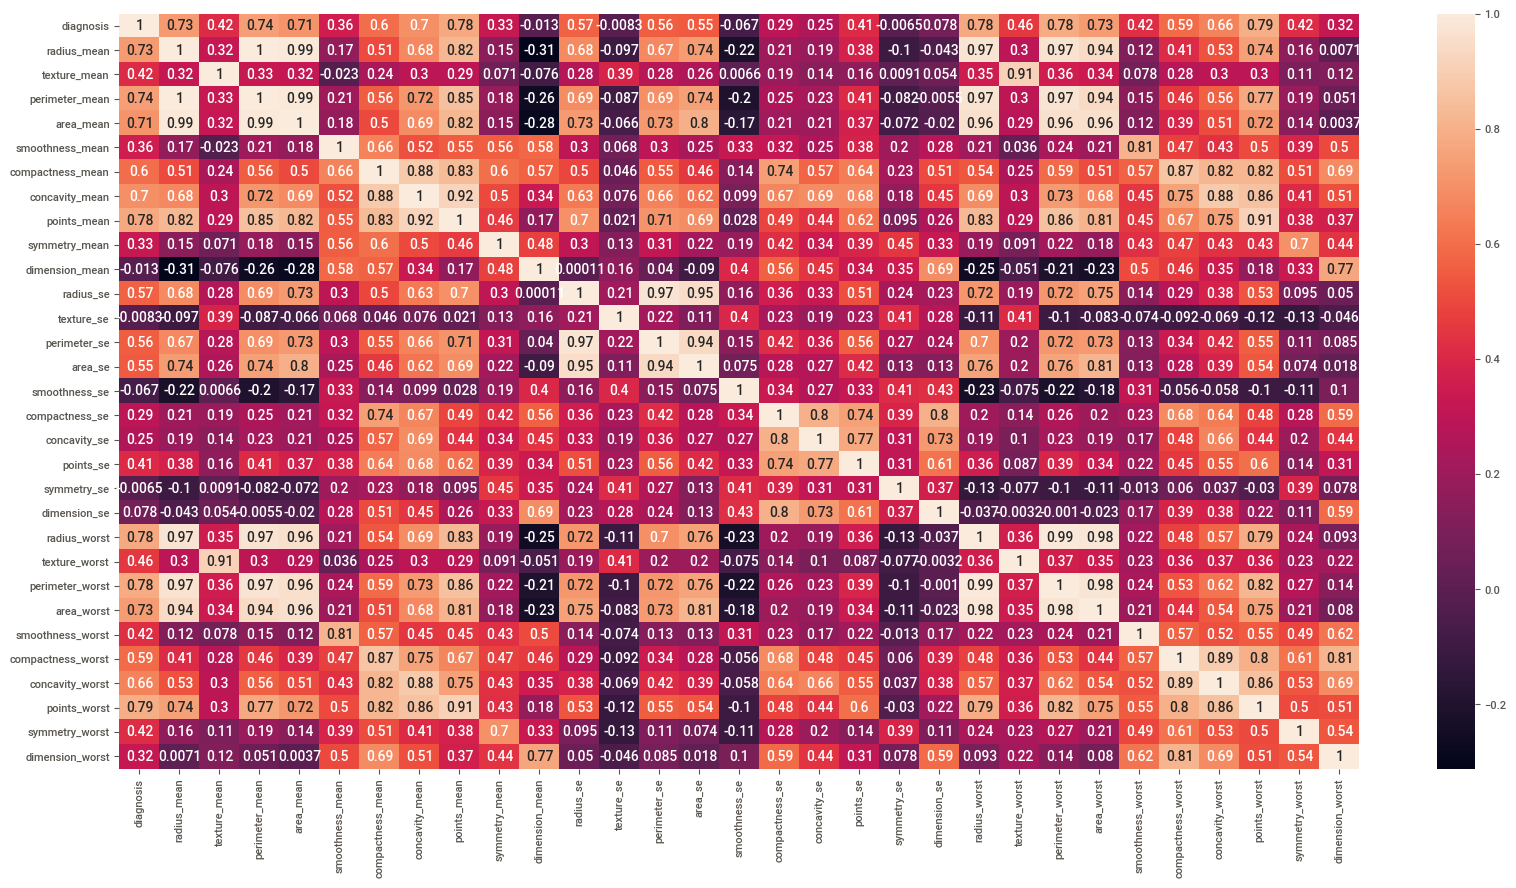

In [456]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)
plt.ioff()

<b> Observations: </b>

Some features are highly correlated with others. Some examples are:
- radius_mean, perimeter_mean, area_mean, radius_worst, periemter_worst, area_worst
- compactness_mean, concavity_mean, points_mean
- radius_se, perimeter_se, area_se
- compactness_worst, concavity_worst, points_worst
- texture_mean, texture_worst

Some features have very low correlation with others.  Some examples are: 
- radius_mean and smoothness_mean
- radius_worst and texture_se
- dimension_mean and texture_mean
- peremeter_mean, symmetry_se

The features that are mostly highly correlated with the target, "diagnosis", are:
- points_worst, radius_worst, perimeter_worst, points_mean

The features least correlated with the target are:
- dimension_mean, texture_se, symmetry_se, and dimension_se

We can plot some scatterplots to visualize these correlations.

In [457]:
# A function to create scatterplots of two features 
def plot_scatters (a,b,c):
    plt.subplot(c)
    sns.scatterplot(x = df_cancer[a], y= df_cancer[b], hue = 'diagnosis', data = df_cancer)
    plt.title(a + ' vs ' + b)

<b> Some highly correlated features:<b> 

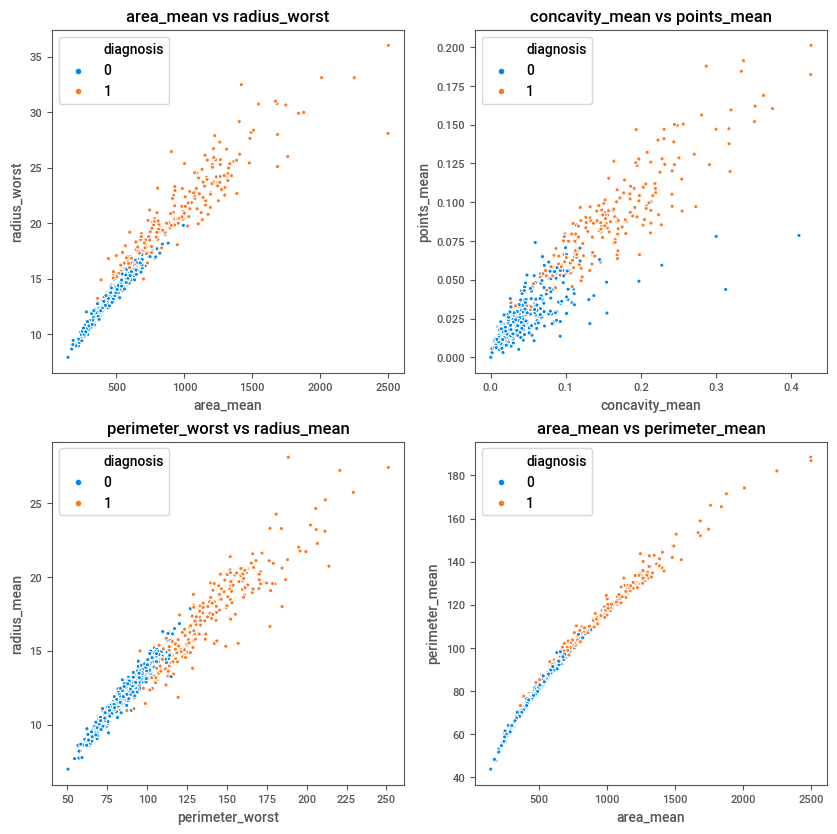

In [458]:
fig = plt.figure(figsize=(10,10))
plot_scatters('area_mean', 'radius_worst', 221)
plot_scatters('concavity_mean', 'points_mean', 222)
plot_scatters('perimeter_worst', 'radius_mean', 223)
plot_scatters('area_mean', 'perimeter_mean', 224)

<b> Some uncorrelated features:</b>

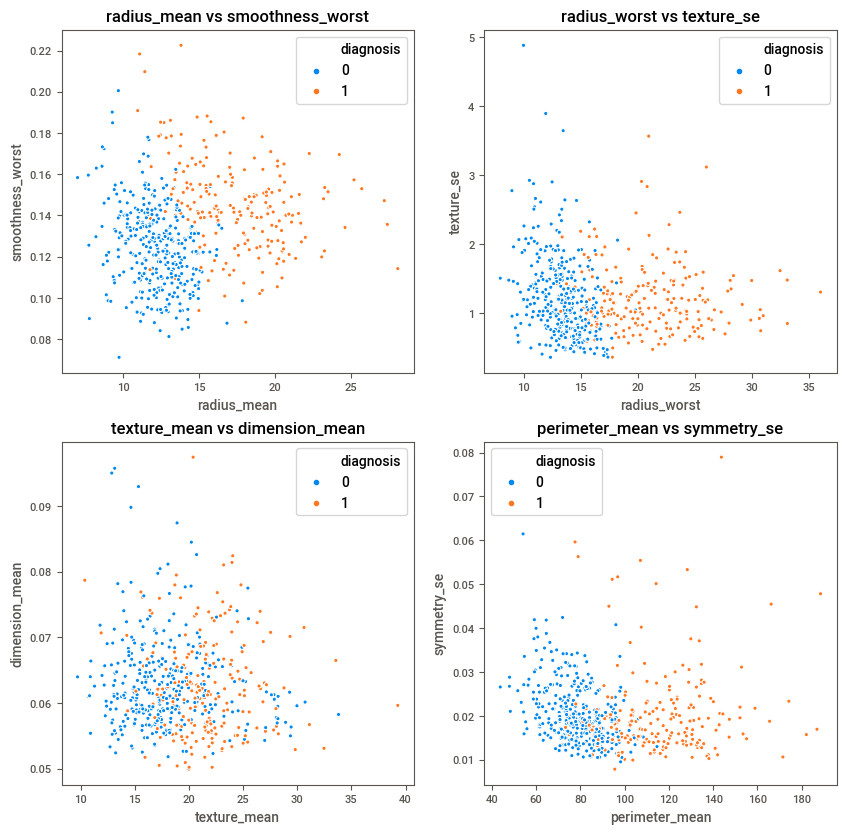

In [459]:
fig = plt.figure(figsize=(10,10))
plot_scatters('radius_mean', 'smoothness_worst', 221)
plot_scatters('radius_worst', 'texture_se', 222)
plot_scatters('texture_mean', 'dimension_mean', 223)
plot_scatters('perimeter_mean', 'symmetry_se', 224)

### Outlier Analysis

Looking at the histograms, the feature "area_se" appears to have quite a few outliers.  We will examine this feature in detail now.

Skew:  5.447186284898393


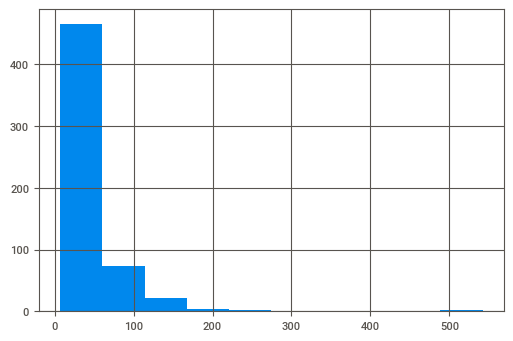

In [460]:
# Plot a historgram for "area_se" and display the skew.
df_cancer['area_se'].hist()
print("Skew: ", df_cancer['area_se'].skew())

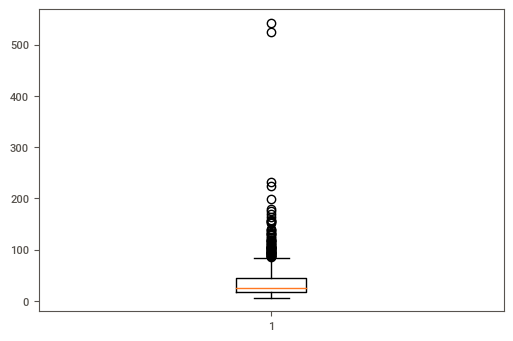

In [461]:
# Create a boxplot
plt.boxplot(df_cancer["area_se"])
plt.show()

We see quite a few outliers as well a couple of very extreme values.

In [462]:
# Define the Interquartile Range to formally find these outliers 
Q1 = df_cancer["area_se"].quantile(0.25)
Q3 = df_cancer["area_se"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [463]:
# Now filter for rows where "area_se" is lower than lower, to indicate outliers on the lower end
df_cancer[(df_cancer["area_se"] < lower)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst


In [464]:
# And do the same for the upper end
df_cancer[(df_cancer["area_se"] > upper)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
18,1,20.09,23.86,134.7,1247.0,0.10800,0.1838,0.2283,0.12800,0.2249,...,23.68,29.43,158.8,1696.0,0.1347,0.3391,0.4932,0.1923,0.3294,0.09469
32,1,17.60,23.33,119.0,980.5,0.09289,0.2004,0.2136,0.10020,0.1696,...,21.57,28.87,143.6,1437.0,0.1207,0.4785,0.5165,0.1996,0.2301,0.12240
36,1,18.94,21.31,123.6,1130.0,0.09009,0.1029,0.1080,0.07951,0.1582,...,24.86,26.58,165.9,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589
41,1,19.59,18.15,130.7,1214.0,0.11200,0.1666,0.2508,0.12860,0.2027,...,26.73,26.39,174.9,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223
47,1,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,1,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.3174,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
509,1,15.50,21.08,102.9,803.1,0.11200,0.1571,0.1522,0.08481,0.2085,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
517,1,19.69,21.25,130.0,1203.0,0.10960,0.1599,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
518,1,18.22,18.70,120.3,1033.0,0.11480,0.1485,0.1772,0.10600,0.2092,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987


Just looking at this one feature, "area_se", we see that we have 65 outliers out of our 569 rows.  

We can perform this computation on each feature if we wished, but clearly we cannot just remove all rows that have outlier values.  Our dataset is very small and we would be removing a lot of rows.

### Feature Engineering:  Data Transformation and Scaling 

Since our features appear to all be positive skewed normal distributions, we will perform a Log Transformation to address this.

In [465]:
# We will first extract all of our features data and store it in X, and our labels we will store in y
y = df_cancer['diagnosis']
X = df_cancer.drop(columns=['diagnosis'])

In [466]:
# Note we have zero values so we have to add a very small value becuase the log function is not defined at 0.
X_log = np.log(X + 0.0000001)

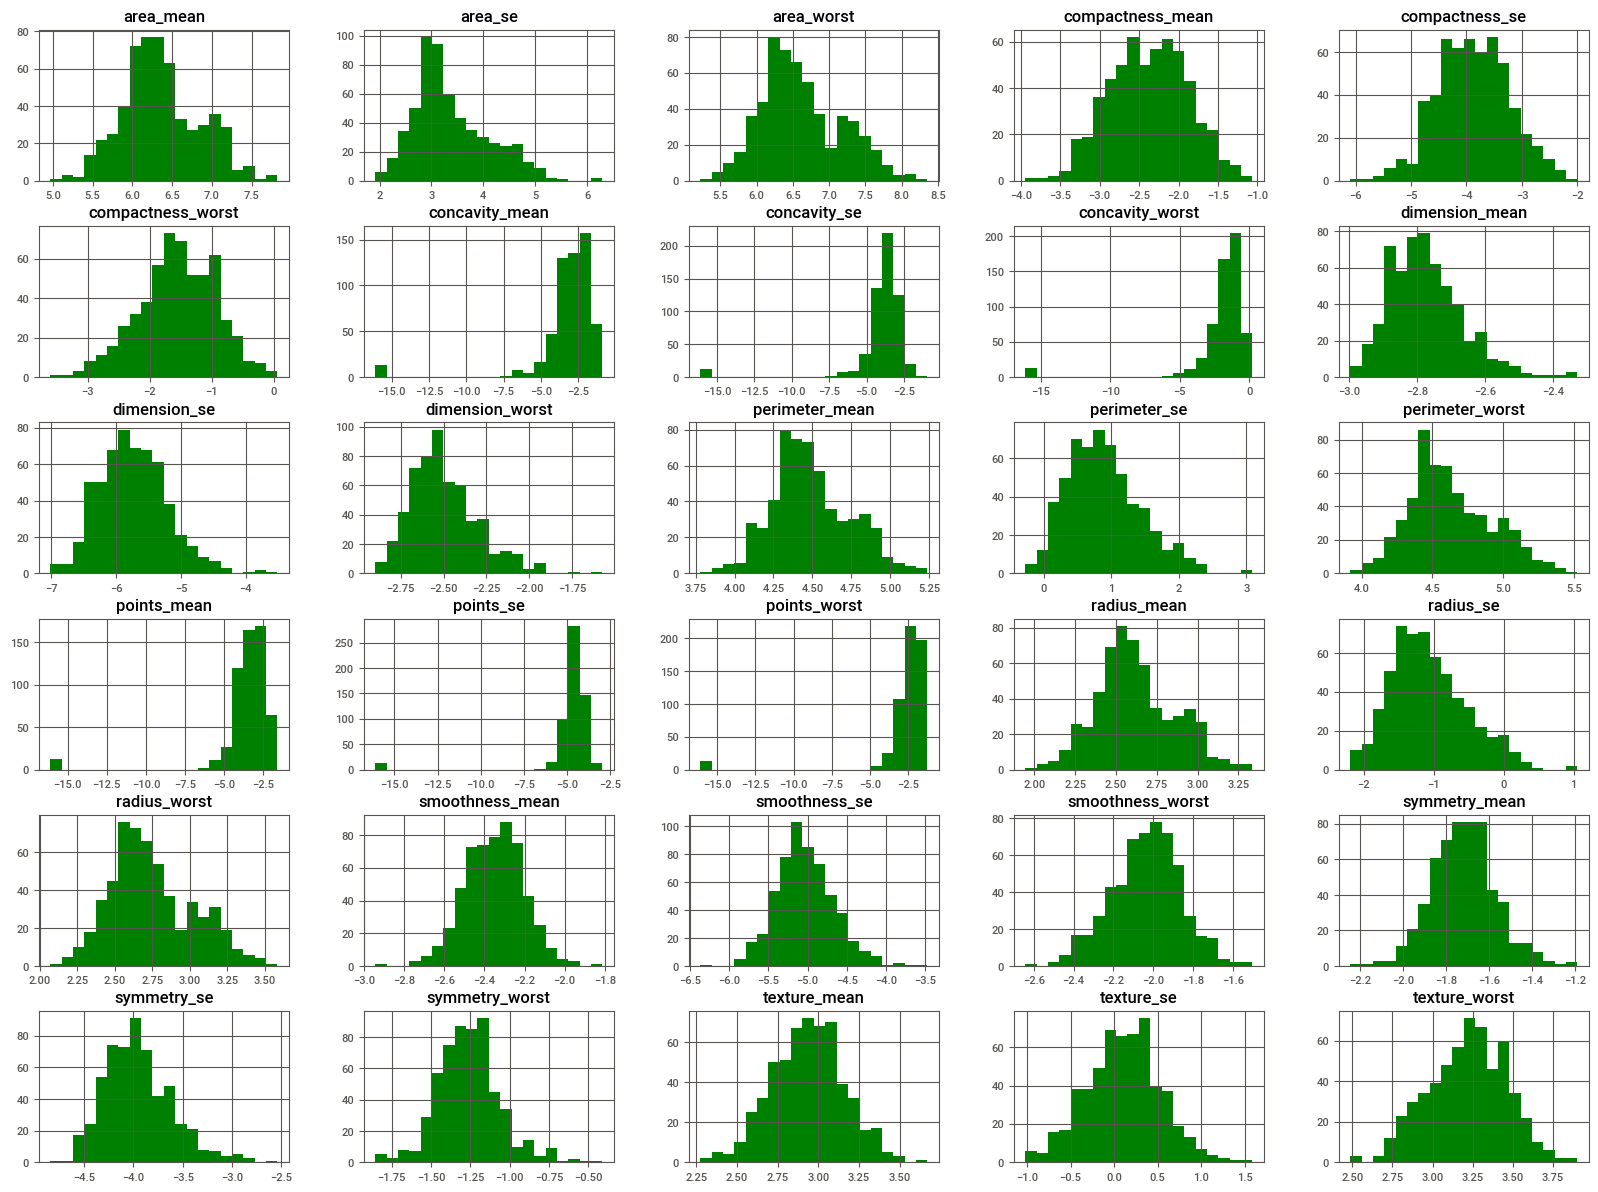

In [467]:
# We will now plot the histograms after this transformation
X_log.hist(bins=20, figsize=(20, 15), color='green')
plt.show()

Overall our distributions appear much closer to normally distributed now, though we still do have some outliers.  

We will now re-examine the "area_se" feature for outliers.

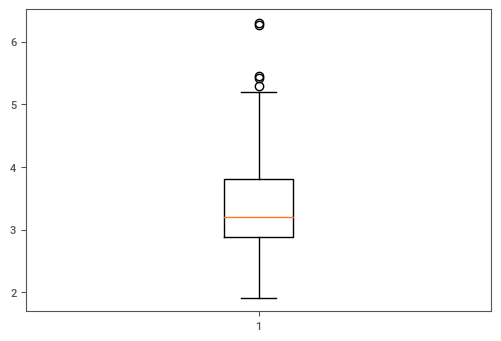

In [468]:
plt.boxplot(X_log["area_se"])
plt.show()

In [469]:
# Recalculate the quartiles and outliers
Q1_2 = X_log["area_se"].quantile(0.25)
Q3_2 = X_log["area_se"].quantile(0.75)
IQR = Q3_2 - Q1_2
lower = Q1_2 - 1.5*IQR
upper = Q3_2 + 1.5*IQR

In [470]:
X_log[(X_log["area_se"] < lower)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst


In [471]:
X_log[(X_log["area_se"] > upper)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
58,3.188417,3.005683,5.113192,7.473637,-1.933092,-1.249319,-0.851440,-1.603455,-1.326140,-2.676986,...,3.258865,3.177637,5.197944,7.636752,-1.774312,-0.857079,-0.544210,-1.492544,-1.132582,-2.524603
123,3.077773,2.847812,4.948050,7.343426,-2.366163,-2.457835,-2.147291,-2.469229,-1.762006,-2.984988,...,3.425890,3.274878,5.295814,8.052933,-1.992896,-1.815232,-1.251414,-1.703748,-1.382302,-2.734290
275,3.336125,2.916148,5.239098,7.823646,-2.169803,-1.886509,-1.139122,-1.835711,-1.803022,-2.895885,...,3.336125,2.916148,5.239098,7.823646,-2.169803,-1.886509,-1.139122,-1.835711,-1.803022,-2.895885
457,3.031582,3.437851,4.910447,7.257708,-2.357146,-2.168928,-1.989966,-2.448072,-1.732170,-2.869274,...,3.480932,3.853546,5.365976,8.140898,-1.965398,-1.330292,-1.066532,-1.796369,-1.248970,-2.498842
460,3.311273,3.268428,5.230574,7.824446,-2.221926,-1.615455,-1.011976,-1.778448,-1.579393,-2.878303,...,3.584629,3.445852,5.526249,8.355615,-1.997308,-0.854255,-0.380821,-1.337504,-1.331427,-2.600047


We have reduced our number of outiers in this one feature from 65 down to 5 by using this Log transformation. 

<b> Scaling:</b>

We will use the RobustScaler here becuase we do have the presence of outliers.  This scaler is based on percentiles and is thus not as influenced by outliers as the StandardScaler and MinMaxScaler are.

In [472]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_log)

columns = X_log.columns
index = X_log.index

# Store these into a new DataFrame, X2
X2 = transformer.transform(X_log)
X2 = pd.DataFrame(X2, columns = columns, index = index)

We will plot our histograms one more time before moving onto modelling. 

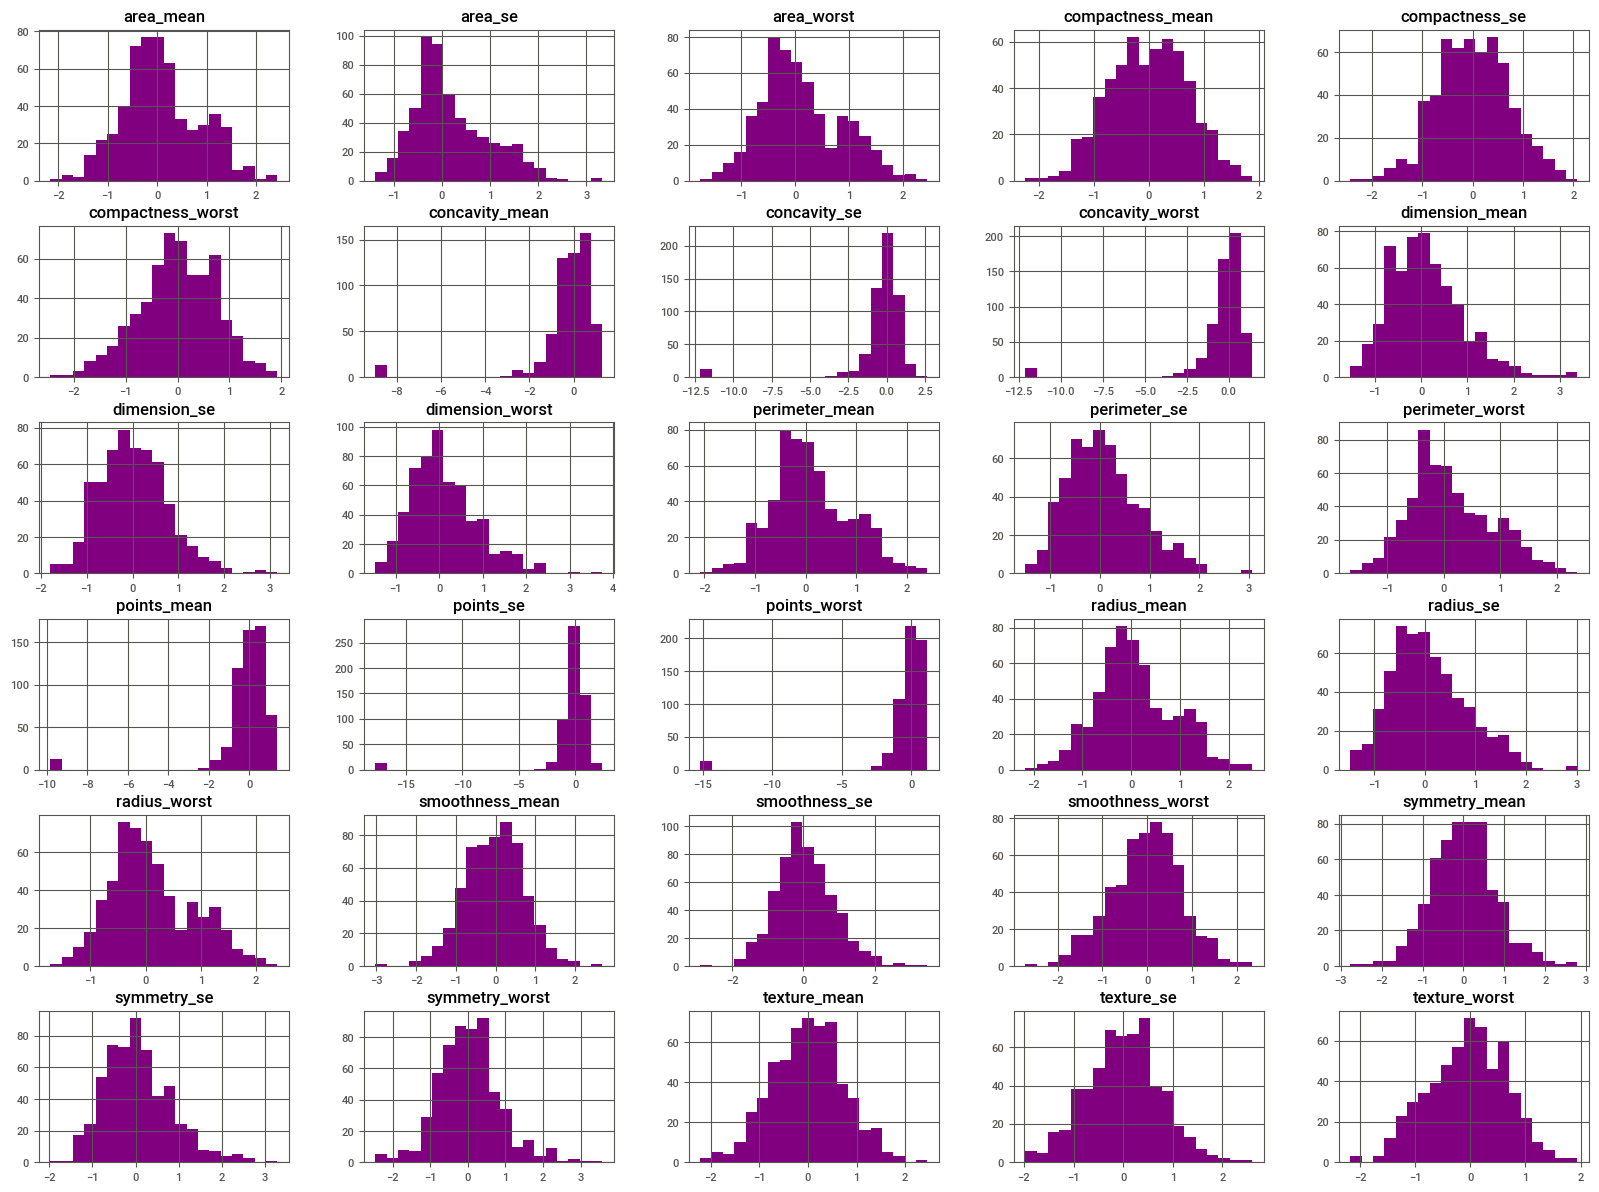

In [473]:
X2.hist(bins=20, figsize=(20, 15), color='purple')
plt.show()

In [474]:
# This is our final features data
X2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.273402,-1.402810,-0.275144,-0.276329,0.352178,-0.405528,-0.292007,0.076857,0.469936,-0.241319,...,-0.281166,-1.412860,-0.290270,-0.300305,0.237420,-0.617232,-0.498455,-0.068235,0.007417,-0.659880
1,-0.776052,0.019487,-0.672537,-0.746762,0.052883,0.306412,0.025000,-0.183629,0.369370,0.391401,...,-0.628911,-0.297706,-0.553854,-0.645436,-0.352303,0.205306,-0.139345,-0.254494,0.171628,-0.211049
2,-0.640099,-0.377635,-0.600681,-0.626912,0.587146,-0.245740,-0.473112,-0.232570,-0.234713,0.218601,...,-0.510180,0.115679,-0.501626,-0.505469,0.185744,-0.428461,-0.624260,-0.325315,0.253479,-0.061086
3,-0.568209,-1.143001,-0.511900,-0.577684,0.979142,0.292595,-0.190696,0.277522,-0.062171,-0.098479,...,-0.619767,-1.388762,-0.610464,-0.616625,0.179242,-0.180957,-0.796297,-0.163462,-1.234121,-0.652314
4,0.426615,-1.188303,0.381621,0.411529,-0.936566,-0.415214,-0.400534,-0.179251,-0.213217,-0.766338,...,0.214803,-1.396155,0.169499,0.237473,-0.683291,-0.238207,-0.422054,-0.220121,-0.529454,-0.662793


In [475]:
# And our target, y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

### Cross Validation

We will explore three models:
- K-Nearest Neighbors 
- Decision Tree
- Random Forest

In [384]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [421]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [422]:
# Splitting into training and testing data for cross validation
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X2, y, stratify = df_cancer.diagnosis, random_state=0)

In [423]:
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.951049
1   DT  0.951049
2   RF  0.958042


In [424]:
strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X2, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.968390
1   DT  0.922682
2   RF  0.963095


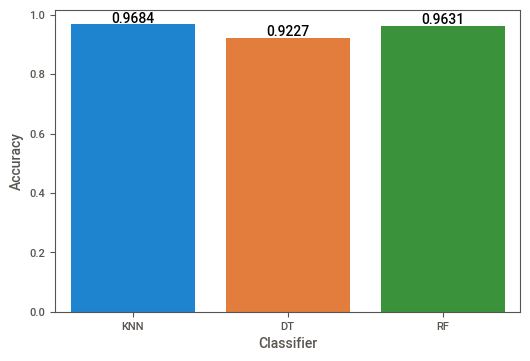

In [425]:
# Plot the accuracies
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Though all three models are performing extremely well, k-Nearest Neighbours and Random Forest both have accuracy above 0.96.  We will explore these two models further.

### k-Nearest Neighbours Analysis

In [429]:
# We will split the data into training and testing and test out KNN with different values of k
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


We have 398 rows for training and 171 rows for testing.

In [430]:
# We will use a loop to test the model with various values for k
# We will test from 1 to 20
accuracies = dict()

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predicted = knn.predict(X_test)
    accuracies[i] = metrics.accuracy_score(y_test, y_predicted)

In [431]:
accuracies

{1: 0.9532163742690059,
 2: 0.9649122807017544,
 3: 0.9707602339181286,
 4: 0.9766081871345029,
 5: 0.9649122807017544,
 6: 0.9707602339181286,
 7: 0.9649122807017544,
 8: 0.9707602339181286,
 9: 0.9766081871345029,
 10: 0.9766081871345029,
 11: 0.9766081871345029,
 12: 0.9649122807017544,
 13: 0.9707602339181286,
 14: 0.9766081871345029,
 15: 0.9707602339181286,
 16: 0.9766081871345029,
 17: 0.9707602339181286,
 18: 0.9766081871345029,
 19: 0.9766081871345029,
 20: 0.9707602339181286}

<BarContainer object of 20 artists>

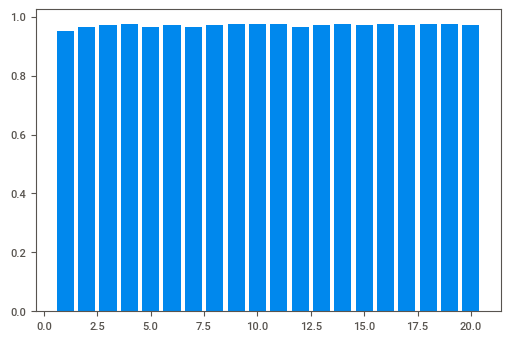

In [432]:
plt.bar(accuracies.keys(), accuracies.values())

The accuracies are very consistent.  0.9766 for k values of 4, 9, 10, 11, 14, 16, 18, and 19 is the highest.

We can generate the confusion matrix and F1 score for k = 4.

In [433]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)

In [434]:
metrics.accuracy_score(y_test, y_predicted)

0.9766081871345029

In [435]:
# Computer the f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted)

0.9649122807017544

In [436]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[112,   1],
       [  3,  55]], dtype=int64)

We see of the 171 testing observations this model has incorrectly predicted 4 of them.

<b>k-Nearest Neighbours with k = 4 produced a 0.9766 accuracy and a 0.9649 F1 score.</b>

### Random Forest Analysis

In [477]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)
rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)
print('Training Set Evaluation F1-Score:',f1_score(y_train,rfc_pred_train))
print('Testing Set Evaluation F1-Score:',f1_score(y_test,rfc_pred_test))

Training Set Evaluation F1-Score: 1.0
Testing Set Evaluation F1-Score: 0.9565217391304347


In [478]:
metrics.accuracy_score(y_test, rfc_pred_test)

0.9707602339181286

In [476]:
confusion_matrix(y_test, rfc_pred_test)

array([[111,   2],
       [  3,  55]], dtype=int64)

We see of the 171 testing observations this model has incorrectly predicted 5 of them.

<b>With some hyperparameter tuning we have improved the Random Forest to an accuracy of 0.9708 and an F1 score of 0.9565.